In [23]:
# The goal is to create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person.
# Data source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
# This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence).

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../DATA/heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


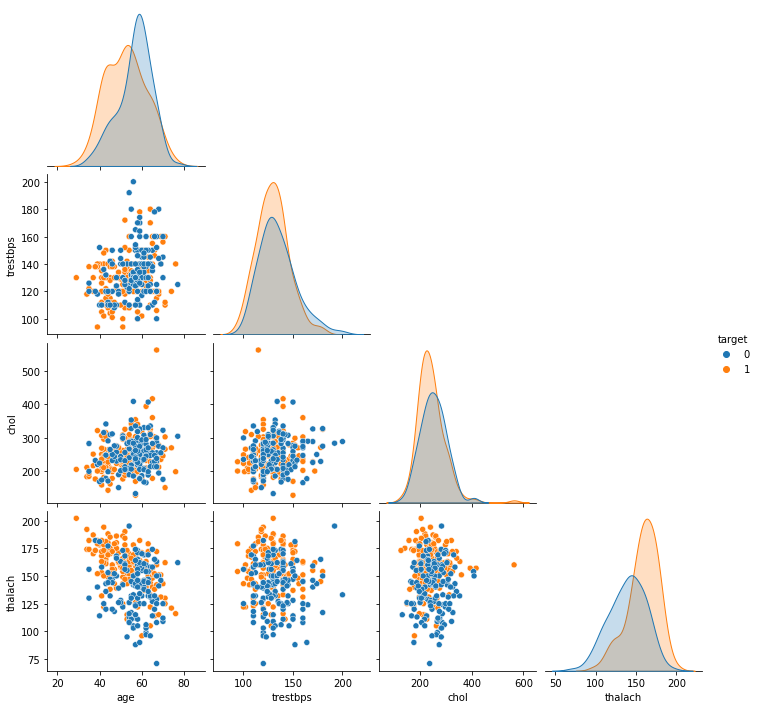

In [26]:
sns.pairplot(data=df,vars=['age','trestbps', 'chol','thalach'],hue='target',corner=True);

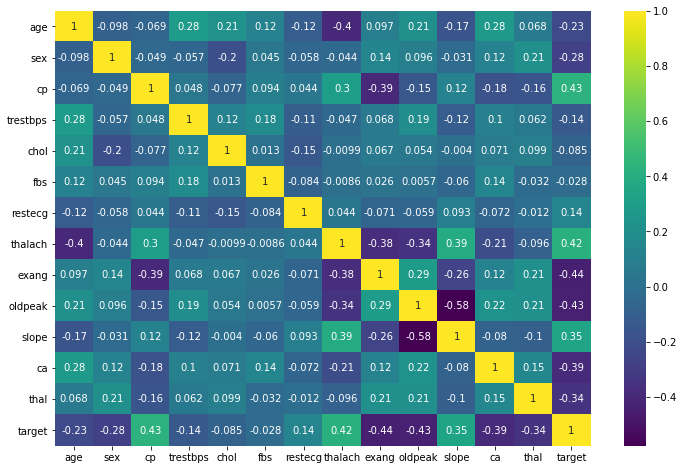

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis');

In [30]:
# Spliting the data
y=df['target']
X=df.drop('target',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [31]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Model definition
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [40]:
# Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
print(f'Accuracy score:\n{accuracy_score(y_test,y_pred)}')
print(f'\nConfusion matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'\nClassification report:\n\n{classification_report(y_test,y_pred)}')


Accuracy score:
0.8387096774193549

Confusion matrix:
[[12  3]
 [ 2 14]]

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

